# Creating Figure 4.6 for Thesis

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')



import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

    
prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)


density_estimator = 'nsf'


In [5]:

from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os


file = '10000sims_17params_11_04_nsf_fake_ratio'



os.chdir('results')


posterior = torch.load('{}/posterior.pt'.format(file))



In [7]:

samples = posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/nflows/transforms/lu.py:81: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs.t(), lower, upper=False, unitriangular=True


acceptance rate:  1.0


In [8]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [9]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.3

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-1.1925e-02,  2.0139e-02,  1.0740e+00,  9.1320e-02, -3.4395e-03,
         1.7532e+01, -1.2467e-05, -2.5777e-05,  1.2885e-02,  2.0892e-02,
        -4.4636e-03,  6.2337e+01, -2.3087e-01,  4.0974e-01, -4.9426e-03,
        -9.4168e-02,  1.1327e+02])
tensor([4.3373e-01, 1.5494e-01, 2.6340e+00, 7.6393e-01, 1.1533e-03, 2.2568e+01,
        4.2826e-05, 4.0252e-02, 3.1968e-02, 2.2039e-01, 1.1594e-01, 6.4696e+01,
        8.5141e+00, 4.0154e+00, 9.7120e-01, 4.2026e-01, 1.2343e+02])
tensor([1.3370e-01, 4.0441e-02, 4.6801e-01, 2.0178e-01, 1.3778e-03, 1.5106e+00,
        1.6588e-05, 1.2083e-02, 5.7249e-03, 5.9850e-02, 3.6120e-02, 7.0757e-01,
        2.6235e+00, 1.0817e+00, 2.9284e-01, 1.5433e-01, 3.0485e+00])


<Figure size 432x288 with 0 Axes>

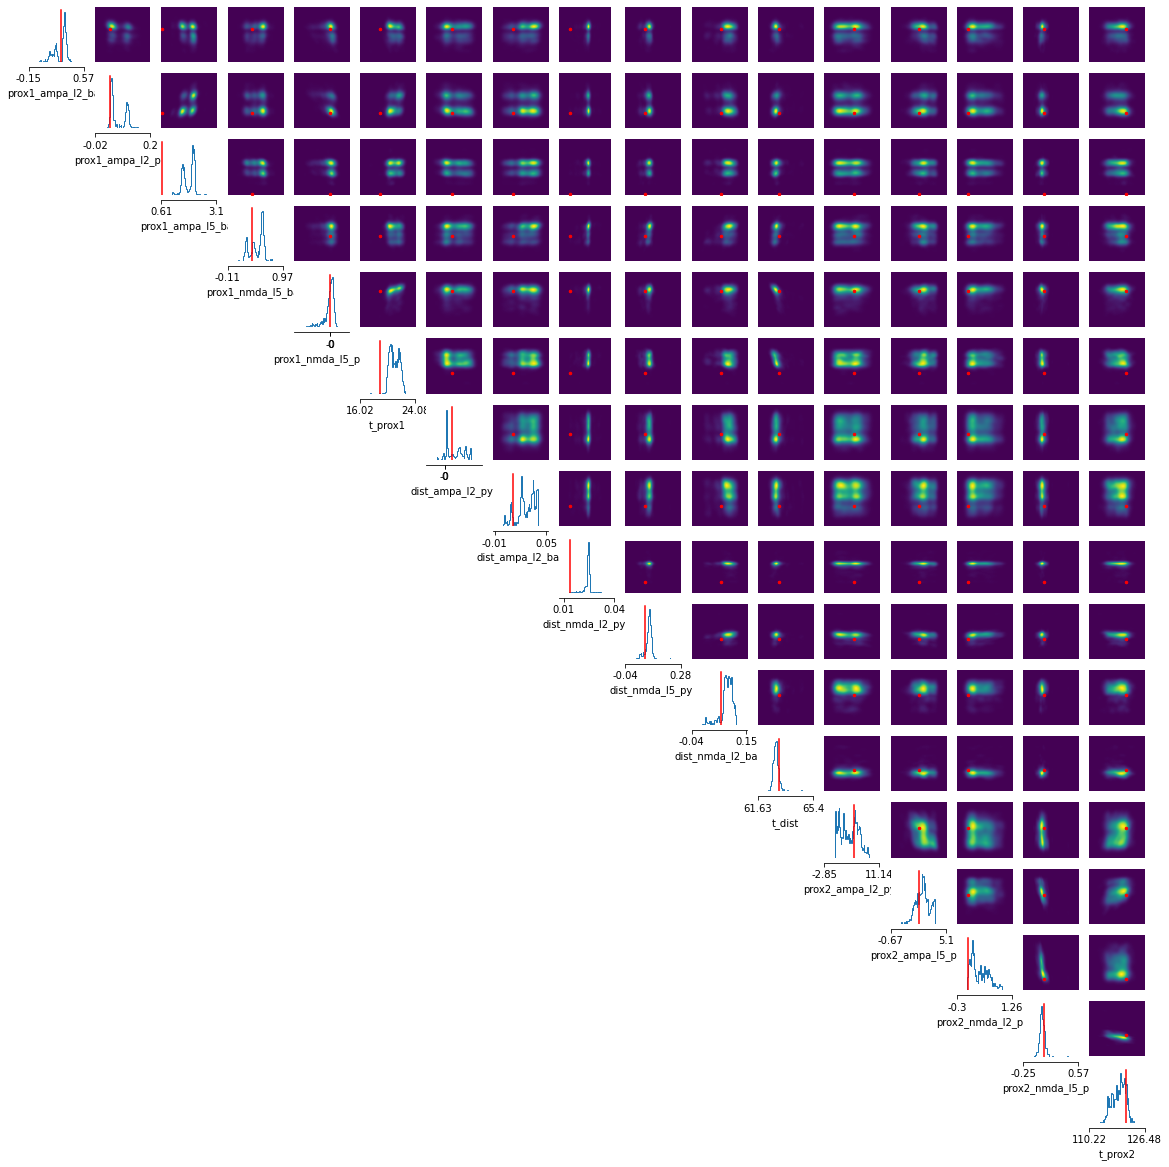

In [10]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')

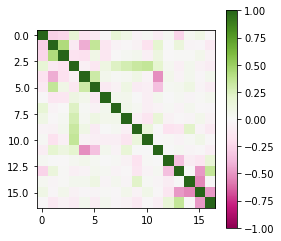

In [11]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [13]:
cond_coeff_mat_list = []

for i in range(5):
    condition = posterior.sample((1,))
    cond_coeff_mat = conditional_corrcoeff(
        density=posterior,
        condition=condition,
        limits=torch.tensor([[-2., 2.]]*17),
    )
    cond_coeff_mat_list.append(cond_coeff_mat)
    
cond_coeff_mat_tensor = torch.stack(cond_coeff_mat_list, dim=0)   

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


In [14]:
cond_coeff_mat_tensor.shape

torch.Size([5, 17, 17])

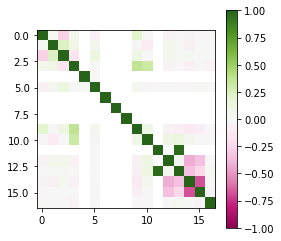

In [15]:
#take average:

cond_coeff_mat_av = torch.nanmean(cond_coeff_mat_tensor, dim = 0)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat_av, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [ ]:
cond_coeff_mat_av

In [17]:
print(torch.__version__)

1.9.1+cu102
